## Lab 5
### UGBA 96: Data and Decisions, Fall 2018

<br>

This lab is designed to be completed in class. However, in case you need additional time, this assignment is due **Tuesday, October 30th at 11:59pm**.

The lab will be graded for **completion**. Lab office hours are held by Connector Assistants on Tuesdays after labs from 1-3pm in the DS Nexus in Moffitt.

## The Labor Market Returns to Attending a Private College

In this lab you will study a causal question introduced in the text: what is the causal effect of attending a private college (versus a public college) on future income?

In this lab you will apply **matching** and get practice thinking through **omitted variable bias**.

---

**Dependencies:**

In [1]:
from datascience import *
import numpy as np
import pandas as pd

#These lines set up graphing capabilities.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('lab5.ok')
_ = ok.auth(inline=True) 

### The Data

For this lab you will use data from the widely-studied National Longitudinal Study of Youth, 1997 cohort. This survey consists of a nationally representative sample of approximately 9,000 youths who were 12 to 16 years old as of December 31, 1996. The survey is longitudinal, meaning the same survey participants are surveyed repeatedly over time. In this case, participants are interviewed once every 1-2 years since 1997. We will study a subset of those survey participants that: (1) went to college; (2) were working for pay in 2013; (3) had parents that reported their income in the original 1997 survey. In total, there are **2327** participants in the data we'll study here.

**Run the cell below to read in the survey data.**

In [2]:
incomes = Table.read_table('private_public.csv')
incomes.show(5)

income,private,parental_income,test_decile
29000,0,11700,3
33000,0,25000,3
40000,1,13000,1
20000,0,40500,5
50000,0,47500,8


Below we describe how each column is defined. Each column represents survey participant. 

* `income`: the income earned by the participant in 2013.
* `private`: an indicator for whether the participant attended a private college (`private` = 0 indicates that the participant attended a public college).
* `parental_income`: the participants parents' income in 1997, when the participant was 12-17 years old.
* `test_decile`: the test score decile (1 is bottom 10% scores, 10 is top 10% of scores) for the participant. Participants take this test in 1997 or 1998, generally prior to attending college. You can think of this test as being equivalent to the SAT.

**Q1.** What is average income for private college and public college attendees, respectively? What is the *difference* in average income between private college and public college attendees?

In [ ]:
#write code here

This is the 'naive' estimate for the average causal effect of attending a private college on income. It is the benchmark we will compare subsequent estimates against. Of course, we know by now that this estimate is contaminated by **selection bias** (and hence, **omitted variable bias**). We will trying controlling for other covariates to get a more credible estimate for the labor market returns to attending a private college.

### Controlling for Test Scores

In this section we will try estimating the return to attending a private college after controlling for `test_decile` via matching. Why might controlling for test scores affect our estimate? There are two reasons. First, participants that attend private colleges tend to have higher test scores.

In [ ]:
#run this cell to compare test scores by private school status
incomes.select('test_decile', 'private').group('private', np.mean)

Second, participants with higher scores tend to have higher incomes.

In [ ]:
#run the cell below to plot average income by `test_decile`
incomes.select('test_decile', 'income').group('test_decile', np.mean).scatter('test_decile')

**Q2.** Given these two facts, how do you anticipate controlling for test scores via matching will affect our estimate for the average causal effect of attending a private college?

*#write answer here*

**Q3.** Match each private college attendee to a randomly selected public college attendee with the same value of `test_decile`.

In [5]:
#below we've created separate tables for private and public college attendees

#generate private table
private = incomes.where('private', 1)

#generate public table
public = incomes.where('private', 0)
public = public.with_column('id', np.arange(public.num_rows))

income,private,parental_income,test_decile
40000,1,13000,1
25000,1,5500,4
32000,1,3750,5
70000,1,110700,10
31000,1,150000,7


In [ ]:
#write your matching funtion here
def match_test_id(test_value):
    ...

In [ ]:
#generate your table of matches here
#use .apply get array of public college attendees
match_indices = ...

#use .take and `match_indices` to get a table of matched public college attendees
public_test_matches = ...
public_test_matches.show(5)

In [ ]:
#print average incomes for private and matched public participants here here

**Q4.** How does controlling for test scores affect your estimated return to attending a private college? Is this consistent with what you expected?

*#write answer here*

### Controlling for Parental Income

Next we will try estimating the return to attending a private college after controlling for `parental_income`.

As you might expect, participants that attend private colleges tend to have higher income parents.

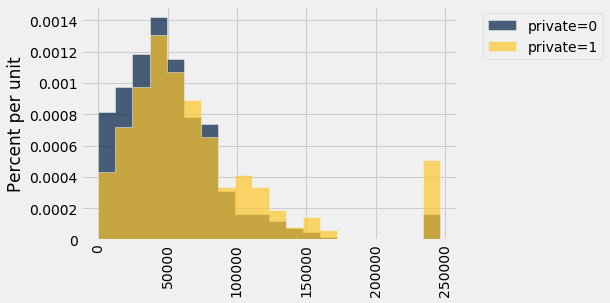

In [3]:
#run the cell below distribution of parental income by private college status
incomes.hist('parental_income', group = 'private', bins = 20)

**Q5.** How do you anticipate controlling for parental income will affect your estimate for the return to attending a private college? **Why?**

*#write your answer here*

You will control for parental income by matching each private college attendee to a public college attendee with similar `parental_income`. However, we will not be able to match exactly on `parental_income` as before because that variable takes too many values. For example, one private school attendee has parents that earned $110,700 in income in 1997 -- it's unlikely to find a public school attendee whose parents made exactly that amount in 1997.

In [6]:
private.take(3)

income,private,parental_income,test_decile
70000,1,110700,10


For this participant, there is no *exact* match among public college attendees. The code below finds the closest match:

In [7]:
#run cell below to find closest match
parinc_diff = abs(public.column('parental_income') - 110700)
min_parinc_diff = min(parinc_diff)
public.with_columns('parinc_diff', parinc_diff).where('parinc_diff', min_parinc_diff)

income,private,parental_income,test_decile,id,parinc_diff
180331,0,110656,9,97,44


**Q6.** Match each one private college attendee to a public with similar `parental_income`. You will not be able to find exact matches for each participcant. Instead, match each private school attendee to the public school attendee with the *smallest absolute difference* in `parental_income` among all public college attendees.

In [ ]:
#write your matching function here
def match_parinc_id(parinc_value):
    ...

In [ ]:
#use .apply get array of public college attendees
match_indices = ...

#use .take and `match_indices` to get a table of matched public college attendees
public_parinc_matches = ...
public_parinc_matches.show(5)

**Q7.** Plot the distributions of `parental_income` for private college attendees and matched public college attendees.

In [ ]:
#write code here for private college attendees

In [ ]:
#write code here for matched public college attendees

The distributions of `parental_income` are now very similar, though not matched exactly.

**Q8.** What is the difference in average income between the private school attendees and the matched public school attendees?

In [ ]:
#print average incomes for private and matched public participants here here

**Q9.** How does controlling for parental income affect your estimated return to attending a private college? Is this consistent with what you expected?

*#write answer here*

----
Congratulations, you've finished Lab 5! To submit the lab, run the two cells below:

In [ ]:
# For your convenience, you can run this cell to run all the tests at once
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [ ]:
_ = ok.submit()